In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import json

53598    1.37
53617    1.00
53636    1.12
53655    0.92
53674    1.78
         ... 
56600     NaN
56619     NaN
56638     NaN
56657     NaN
56676     NaN
Name: Score, Length: 163, dtype: float64

In [142]:
df_cnd = pd.read_csv("Complications_and_Deaths-Hospital.csv")
df_cnd.head()
df = df_cnd[df_cnd["State"] == "NY"]
clean = lambda x: float(x) if x != "Not Applicable" and x != "Not Available" else np.nan
df["values"] = df["Score"].map(clean)/df["Denominator"].map(clean)
df.loc[df["Measure ID"] == "PSI_90", "values"] = df[df["Measure ID"] == "PSI_90"]["Score"].map(clean)

# Display the first few rows to verify
df.head()


/var/folders/fq/6j5vjdy13w36prs570mvsk300000gn/T/ipykernel_84691/3410728388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["values"] = df["Score"].map(clean)/df["Denominator"].map(clean)


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Start Date,End Date,values
53580,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,NY,14210,ERIE,(716) 859-8620,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,88,3.6,2.1,6.2,NaN,07/01/2020,03/31/2023,0.040909
53581,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,NY,14210,ERIE,(716) 859-8620,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,285,11,8.8,13.7,NaN,07/01/2020,06/30/2023,0.038596
53582,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,NY,14210,ERIE,(716) 859-8620,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,160,2.1,1.0,4.0,NaN,07/01/2020,06/30/2023,0.013125
53583,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,NY,14210,ERIE,(716) 859-8620,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,244,7.5,5.4,10.5,NaN,07/01/2020,06/30/2023,0.030738
53584,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,NY,14210,ERIE,(716) 859-8620,MORT_30_HF,Death rate for heart failure patients,Better Than the National Rate,659,8.7,7.0,10.8,NaN,07/01/2020,06/30/2023,0.013202


In [143]:
df[df["Measure ID"] == "PSI_90"]["values"]

53598    1.37
53617    1.00
53636    1.12
53655    0.92
53674    1.78
         ... 
56600     NaN
56619     NaN
56638     NaN
56657     NaN
56676     NaN
Name: values, Length: 163, dtype: float64

In [144]:
df["Facility Name"].unique().shape

(163,)

In [145]:
n_bins = 20

percentile_map = {}
for measure in df["Measure ID"].unique():
    arr = df[df["Measure ID"] == measure]["values"]
    percentiles = np.nanpercentile(arr, np.arange(0, 101, 100/n_bins))
    percentile_map[measure] = percentiles

percentile_map["COMP_HIP_KNEE"]

array([0.00066938, 0.00265156, 0.0056283 , 0.00819255, 0.00902843,
       0.01214435, 0.01420807, 0.02106337, 0.02312821, 0.02534081,
       0.03097345, 0.03494343, 0.03842958, 0.04332773, 0.05189873,
       0.0669697 , 0.07193158, 0.08333333, 0.10058824, 0.11796296,
       0.14      ])

In [146]:

bins = []
for i in range(df.shape[0]):
    bins.append(find_bin(df.iloc[i]["values"], percentile_map[df.iloc[i]["Measure ID"]]))

[0.00066938 0.00265156 0.0056283  0.00819255 0.00902843 0.01214435
 0.01420807 0.02106337 0.02312821 0.02534081 0.03097345 0.03494343
 0.03842958 0.04332773 0.05189873 0.0669697  0.07193158 0.08333333
 0.10058824 0.11796296 0.14      ]
[0.01140741 0.02598076 0.03379805 0.04079242 0.04628477 0.05364867
 0.06254787 0.07308885 0.08425973 0.09171279 0.11182476 0.12636746
 0.15214656 0.18526988 0.20522464 0.24349839 0.27911111 0.36354167
 0.41236559 0.47273333 0.564     ]
[0.0040107  0.00420244 0.0043669  0.00502955 0.00818145 0.01196702
 0.01332044 0.01524218 0.01558824 0.0174439  0.01784533 0.0200579
 0.02358261 0.02465496 0.02639663 0.0332623  0.03791894 0.04261569
 0.0482567  0.05549935 0.07962963]
[0.01099796 0.02914102 0.03664286 0.04421232 0.0585034  0.06519017
 0.07372881 0.08012164 0.09310345 0.09836456 0.10457158 0.11810448
 0.13125    0.14021526 0.16273148 0.17725626 0.19552239 0.22598134
 0.25941176 0.28967928 0.4037037 ]
[0.00235381 0.00861757 0.01370371 0.01884559 0.02198068 0

In [147]:
df["percentile"] = bins

/var/folders/fq/6j5vjdy13w36prs570mvsk300000gn/T/ipykernel_84691/630011342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["percentile"] = bins


In [148]:
percentile_map

{'COMP_HIP_KNEE': array([0.00066938, 0.00265156, 0.0056283 , 0.00819255, 0.00902843,
        0.01214435, 0.01420807, 0.02106337, 0.02312821, 0.02534081,
        0.03097345, 0.03494343, 0.03842958, 0.04332773, 0.05189873,
        0.0669697 , 0.07193158, 0.08333333, 0.10058824, 0.11796296,
        0.14      ]),
 'MORT_30_AMI': array([0.01140741, 0.02598076, 0.03379805, 0.04079242, 0.04628477,
        0.05364867, 0.06254787, 0.07308885, 0.08425973, 0.09171279,
        0.11182476, 0.12636746, 0.15214656, 0.18526988, 0.20522464,
        0.24349839, 0.27911111, 0.36354167, 0.41236559, 0.47273333,
        0.564     ]),
 'MORT_30_CABG': array([0.0040107 , 0.00420244, 0.0043669 , 0.00502955, 0.00818145,
        0.01196702, 0.01332044, 0.01524218, 0.01558824, 0.0174439 ,
        0.01784533, 0.0200579 , 0.02358261, 0.02465496, 0.02639663,
        0.0332623 , 0.03791894, 0.04261569, 0.0482567 , 0.05549935,
        0.07962963]),
 'MORT_30_COPD': array([0.01099796, 0.02914102, 0.03664286, 0.04421232

In [149]:
df.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Start Date,End Date,values,percentile
53580,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,NY,14210,ERIE,(716) 859-8620,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,88,3.6,2.1,6.2,NaN,07/01/2020,03/31/2023,0.040909,65.0
53581,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,NY,14210,ERIE,(716) 859-8620,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,285,11,8.8,13.7,NaN,07/01/2020,06/30/2023,0.038596,15.0
53582,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,NY,14210,ERIE,(716) 859-8620,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,160,2.1,1.0,4.0,NaN,07/01/2020,06/30/2023,0.013125,30.0
53583,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,NY,14210,ERIE,(716) 859-8620,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,244,7.5,5.4,10.5,NaN,07/01/2020,06/30/2023,0.030738,10.0
53584,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,NY,14210,ERIE,(716) 859-8620,MORT_30_HF,Death rate for heart failure patients,Better Than the National Rate,659,8.7,7.0,10.8,NaN,07/01/2020,06/30/2023,0.013202,10.0


In [150]:
def find_bin(value, percentiles):
    # Ensure percentiles are sorted
    percentiles = np.sort(percentiles)
    print(percentiles)

    if np.isnan(value):
        return np.nan
    
    # Find the bin by checking where the value falls between percentiles
    for i in range(1, len(percentiles)):
        if value <= percentiles[i]:
            return i*(100 / n_bins)
    
    # If the value is greater than the highest percentile, it's in the last bin
    return 100

In [151]:
df["Measure ID"].unique()

array(['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_03', 'PSI_04',
       'PSI_06', 'PSI_08', 'PSI_09', 'PSI_10', 'PSI_11', 'PSI_12',
       'PSI_13', 'PSI_14', 'PSI_15', 'PSI_90'], dtype=object)

In [152]:
df[df["Measure ID"] == "PSI_90"]["values"].dropna()

53598    1.37
53617    1.00
53636    1.12
53655    0.92
53674    1.78
         ... 
56144    1.54
56163    1.13
56182    1.68
56201    1.50
56220    0.86
Name: values, Length: 133, dtype: float64

In [153]:
find_bin(0.09, percentile_map["COMP_HIP_KNEE"])

[0.00066938 0.00265156 0.0056283  0.00819255 0.00902843 0.01214435
 0.01420807 0.02106337 0.02312821 0.02534081 0.03097345 0.03494343
 0.03842958 0.04332773 0.05189873 0.0669697  0.07193158 0.08333333
 0.10058824 0.11796296 0.14      ]


90.0

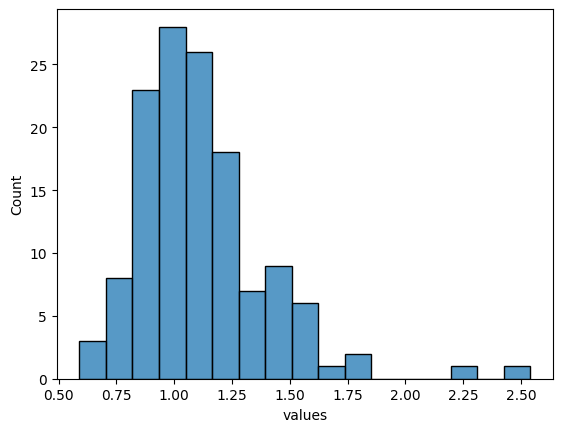

In [154]:
ax = sns.histplot(df[df["Measure ID"] == "PSI_90"]["values"].dropna())

#bin_edges = ax.patches[0].get_x() + ax.patches[0].get_width() * np.array([0, 1])

# Alternatively, if you want to directly access the bin edges from matplotlib:
#bin_edges

<Axes: xlabel='percentile', ylabel='Density'>

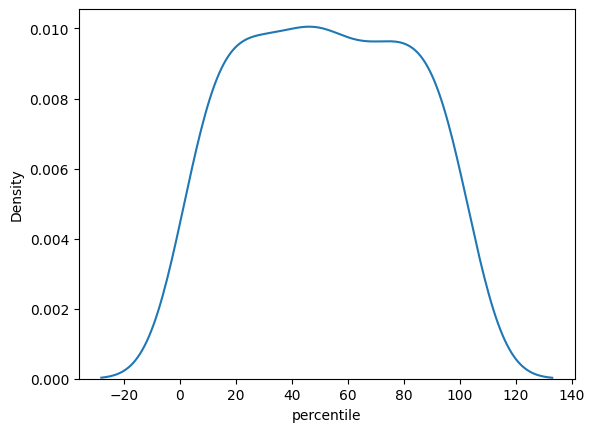

In [156]:
sns.kdeplot(df[df["Measure ID"] == "PSI_90"]["percentile"])

In [157]:
df["Measure Name"].unique()

array(['Rate of complications for hip/knee replacement patients',
       'Death rate for heart attack patients',
       'Death rate for CABG surgery patients',
       'Death rate for COPD patients',
       'Death rate for heart failure patients',
       'Death rate for pneumonia patients',
       'Death rate for stroke patients', 'Pressure ulcer rate',
       'Death rate among surgical inpatients with serious treatable complications',
       'Iatrogenic pneumothorax rate',
       'In-hospital fall-associated fracture rate',
       'Postoperative hemorrhage or hematoma rate',
       'Postoperative acute kidney injury requiring dialysis rate',
       'Postoperative respiratory failure rate',
       'Perioperative pulmonary embolism or deep vein thrombosis rate',
       'Postoperative sepsis rate', 'Postoperative wound dehiscence rate',
       'Abdominopelvic accidental puncture or laceration rate',
       'CMS Medicare PSI 90: Patient safety and adverse events composite'],
      dtype=ob

In [158]:
df['Measure ID'].unique()

array(['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_03', 'PSI_04',
       'PSI_06', 'PSI_08', 'PSI_09', 'PSI_10', 'PSI_11', 'PSI_12',
       'PSI_13', 'PSI_14', 'PSI_15', 'PSI_90'], dtype=object)

In [159]:
# Create a dictionary mapping Measure IDs to Measure Names
measure_df = df[['Measure ID', 'Measure Name']].drop_duplicates()
# Display the mapping


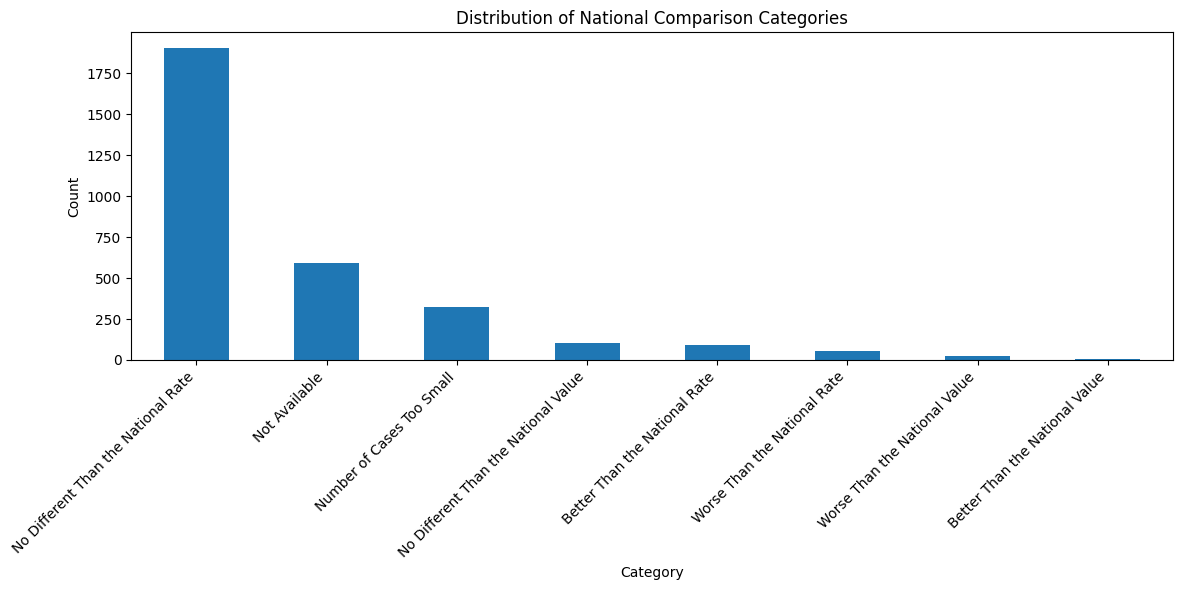

In [160]:
df['Compared to National'].unique()
plt.figure(figsize=(12, 6))
df['Compared to National'].value_counts().plot(kind='bar')
plt.title('Distribution of National Comparison Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [161]:
measure_df["Measure ID"].unique()

array(['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_03', 'PSI_04',
       'PSI_06', 'PSI_08', 'PSI_09', 'PSI_10', 'PSI_11', 'PSI_12',
       'PSI_13', 'PSI_14', 'PSI_15', 'PSI_90'], dtype=object)

In [162]:
print(measure_df['Measure Name'].unique())

['Rate of complications for hip/knee replacement patients'
 'Death rate for heart attack patients'
 'Death rate for CABG surgery patients' 'Death rate for COPD patients'
 'Death rate for heart failure patients'
 'Death rate for pneumonia patients' 'Death rate for stroke patients'
 'Pressure ulcer rate'
 'Death rate among surgical inpatients with serious treatable complications'
 'Iatrogenic pneumothorax rate'
 'In-hospital fall-associated fracture rate'
 'Postoperative hemorrhage or hematoma rate'
 'Postoperative acute kidney injury requiring dialysis rate'
 'Postoperative respiratory failure rate'
 'Perioperative pulmonary embolism or deep vein thrombosis rate'
 'Postoperative sepsis rate' 'Postoperative wound dehiscence rate'
 'Abdominopelvic accidental puncture or laceration rate'
 'CMS Medicare PSI 90: Patient safety and adverse events composite']


In [163]:
name_dict = {
    "Rate of complications for hip/knee replacement patients": "replacement",
    "Death rate for heart attack patients": "heartattack",
    "Death rate for CABG surgery patients": "cabg",
    "Death rate for COPD patients": "copd",
    "Death rate for heart failure patients": "heartfailure",
    "Death rate for pneumonia patients": "pneumonia",
    "Death rate for stroke patients": "stroke",
    "Pressure ulcer rate": "ulcer",
    "Death rate among surgical inpatients with serious treatable complications": "surgery",
    "Iatrogenic pneumothorax rate": "pneumothorax",
    "In-hospital fall-associated fracture rate": "fall",
    "Postoperative hemorrhage or hematoma rate": "hemorrhage",
    "Postoperative acute kidney injury requiring dialysis rate": "kidneyinjury",
    "Postoperative respiratory failure rate": "respiratoryfailure",
    "Perioperative pulmonary embolism or deep vein thrombosis rate": "embolism",
    "Postoperative sepsis rate": "sepsis",
    "Postoperative wound dehiscence rate": "wounddehiscence",
    "Abdominopelvic accidental puncture or laceration rate": "puncture",
    "CMS Medicare PSI 90: Patient safety and adverse events composite": "patientsafety"
}

In [169]:
def create_facility_dict(df):
    facilities = {}
    
    for facility_id in df['Facility ID'].unique():
        facility_data = df[df['Facility ID'] == facility_id]
        
        # Get basic facility info from first row
        basic_info = facility_data.iloc[0]
        
        facilities[facility_id] = {
            'name': basic_info['Facility Name'],
            'address': basic_info['Address'],
            'id': facility_id,
            'safety_stats': {}
        }
        
        # Add rate statistics for each measure
        for _, row in facility_data.iterrows():
            # Split Measure ID to get type (e.g., 'PSI', 'MORT', 'COMP')
            measure_type_code = row['Measure ID'].split('_')[0]
            
            # Determine type of condition based on code
            if measure_type_code == 'PSI':
                measure_type = 'Rate of potentially preventable complications'
            elif measure_type_code == 'MORT':
                measure_type = 'Mortality rate'
            elif measure_type_code == 'COMP':
                measure_type = 'Complications preventable/pre-existing'
            
            facilities[facility_id]['safety_stats'][row['Measure ID']] = {
                'condition_type': measure_type,
                'name_type': row['Measure Name'],  # Using actual Measure Name instead of startswith
                'category': name_dict[row['Measure Name']],
                'score': -1 if np.isnan(row['values']) else row['values'],
                'percentile': -1 if np.isnan(row['percentile']) else row['percentile']
            }
    
    return facilities

# Create the dictionary
ny_facilities = create_facility_dict(df)

# Save to JSON file with nice formatting
with open('ny_hospital_safety_stats.json', 'w') as f:
    json.dump(ny_facilities, f, indent=4)

# Print example to verify (optional)
first_facility_id = list(ny_facilities.keys())[0]
print(f"Sample facility data has been saved to ny_facilities.json")


Sample facility data has been saved to ny_facilities.json


In [170]:
ny_facilities["330005"]

{'name': 'KALEIDA HEALTH',
 'address': '100 HIGH STREET',
 'id': '330005',
 'safety_stats': {'COMP_HIP_KNEE': {'condition_type': 'Complications preventable/pre-existing',
   'name_type': 'Rate of complications for hip/knee replacement patients',
   'category': 'replacement',
   'score': 0.04090909090909091,
   'percentile': 65.0},
  'MORT_30_AMI': {'condition_type': 'Mortality rate',
   'name_type': 'Death rate for heart attack patients',
   'category': 'heartattack',
   'score': 0.03859649122807018,
   'percentile': 15.0},
  'MORT_30_CABG': {'condition_type': 'Mortality rate',
   'name_type': 'Death rate for CABG surgery patients',
   'category': 'cabg',
   'score': 0.013125000000000001,
   'percentile': 30.0},
  'MORT_30_COPD': {'condition_type': 'Mortality rate',
   'name_type': 'Death rate for COPD patients',
   'category': 'copd',
   'score': 0.030737704918032786,
   'percentile': 10.0},
  'MORT_30_HF': {'condition_type': 'Mortality rate',
   'name_type': 'Death rate for heart fai